# Global Suicides Data Exploration

## by Ayush Patel

This dataset was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.The dataset contains yearly suicide detail of different countries by various parameters from 1985 to 2016.This data contains information about countries and no of suicide in that country for particular year.

#### Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### Loading dataset

In [123]:
data=pd.read_csv('/home/parth/Desktop/Projects/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [124]:
data.shape

(27820, 11)

### What is the structure of my dataset?
         The dataset includes 27820 rows and 
         11 columns

### Renaming the variables 

In [125]:
data.rename(columns={" gdp_for_year ($) ":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita"},inplace=True)

### Type of Data 

In [126]:
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_for_year          object
gdp_per_capita         int64
generation            object
dtype: object

In [127]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [128]:
# Filling mean of "HDI for year" inplace of null values in same column
data.fillna(data.mean(), inplace=True)
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


### Total no of suicides from 1985-2016
    

In [129]:
data['suicides_no'].sum()

6748420

#### Total no of death due to suicide were 6748420

### Suicides no curve

Text(0,0.5,'suicides_no')

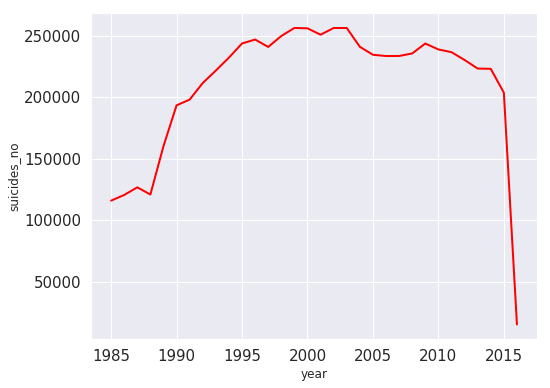

In [130]:
ns = data['suicides_no'].groupby(data.year).sum()
ns.plot(figsize=(8,6), linewidth=2, fontsize=15,color='red')
plt.xlabel('year')
plt.ylabel('suicides_no')

## Suicide count by Country

In [131]:
by_country=data.groupby('country')[['suicides_no']].sum().sort_values(by='suicides_no',ascending=False).reset_index()
by_country.style.background_gradient(cmap='icefire',subset=['suicides_no'])

,country,suicides_no
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950
5,Germany,291262
6,Republic of Korea,261730
7,Brazil,226613
8,Poland,139098
9,United Kingdom,136805


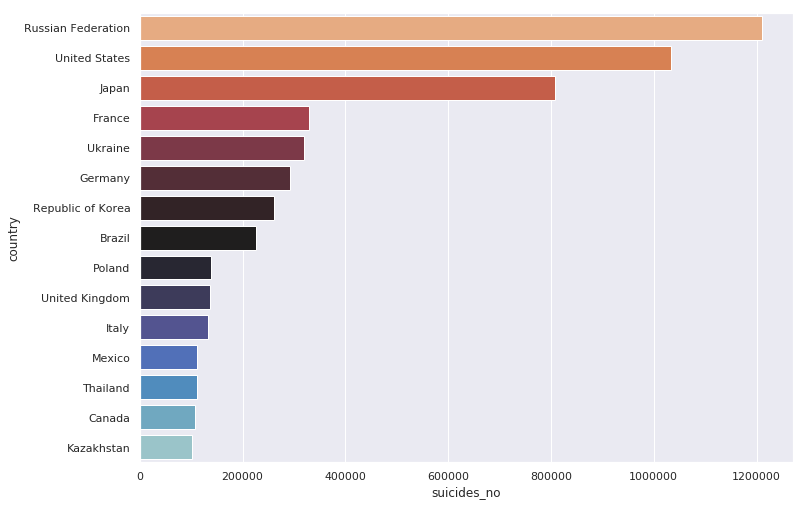

In [132]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
by_country= data['suicides_no'].groupby(data.country).sum().sort_values(ascending=False)
by_country= sns.barplot(by_country.head(15), by_country.head(15).index, palette='icefire_r')

#### It was found that russia had highest suicides rate till 2016

## Suicide count by Year

In [133]:
by_year=data.groupby('year')[['suicides_no']].sum().sort_values(by='suicides_no',ascending=False).reset_index()
by_year.style.background_gradient(cmap='cool_r',subset=['suicides_no'])


,year,suicides_no
0,1999,256119
1,2002,256095
2,2003,256079
3,2000,255832
4,2001,250652
5,1998,249591
6,1996,246725
7,1995,243544
8,2009,243487
9,2004,240861


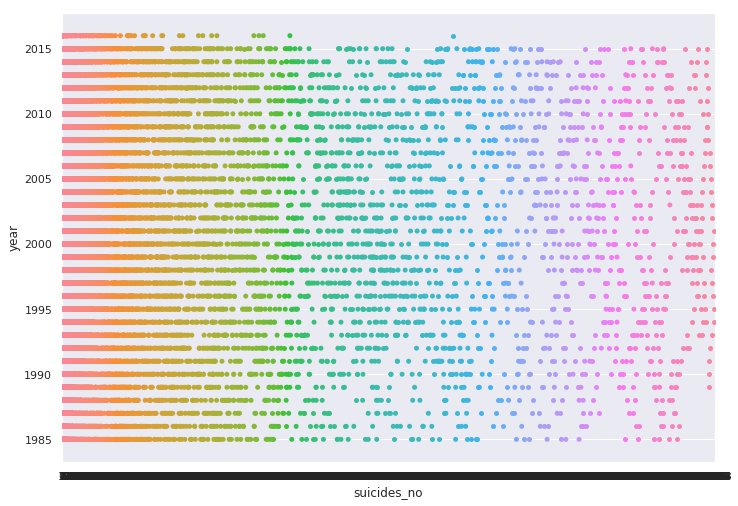

In [134]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.stripplot(x=data['suicides_no'],y=data['year'])
plt.show()

#### Year 1999 had highest death due to suicide ie 256119 and 2016 had lowest death ie 15603

### Count based on Sex

In [135]:
by_sex=data.groupby('sex')[['suicides_no']].sum()
by_sex.style.background_gradient(cmap='icefire_r',subset=['suicides_no'])


,suicides_no
sex,
female,1559510
male,5188910


#### Globally, death by suicide occurred more often among males than among females

## Distribution based on Age

In [136]:
by_agegroup=data.groupby('age')[['suicides_no']].sum().sort_values(by='suicides_no',ascending=False)
by_agegroup.style.background_gradient(cmap='autumn_r',subset=['suicides_no'])

,suicides_no
age,
35-54 years,2452141
55-74 years,1658443
25-34 years,1123912
15-24 years,808542
75+ years,653118
5-14 years,52264


#### Worldwide, suicide ranks among the three leading causes of death among those aged 35-54 years.

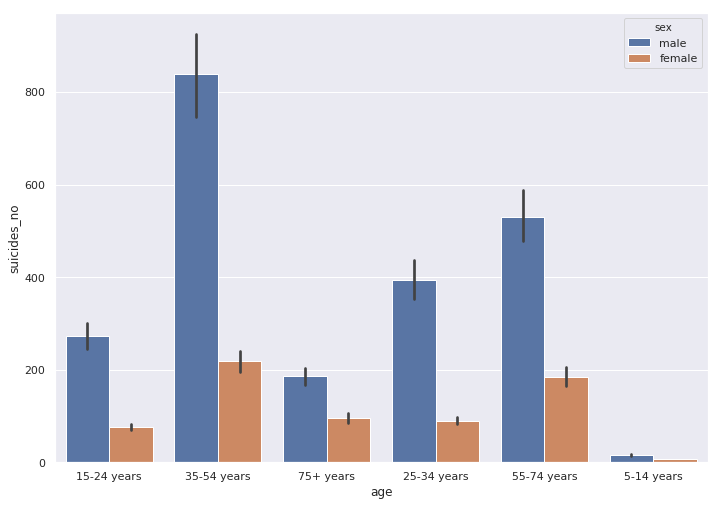

In [137]:
# Visualizing distribution based on age
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=sns.barplot(x=data['age'],y=data['suicides_no'],hue='sex',data=data)

## Distribution based on Generation

In [138]:
by_generation=data.groupby('generation')[['suicides_no']].sum().sort_values(by='suicides_no',ascending=False)
by_generation.style.background_gradient(cmap='autumn_r',subset=['suicides_no'])

,suicides_no
generation,
Boomers,2284498
Silent,1781744
Generation X,1532804
Millenials,623459
G.I. Generation,510009
Generation Z,15906


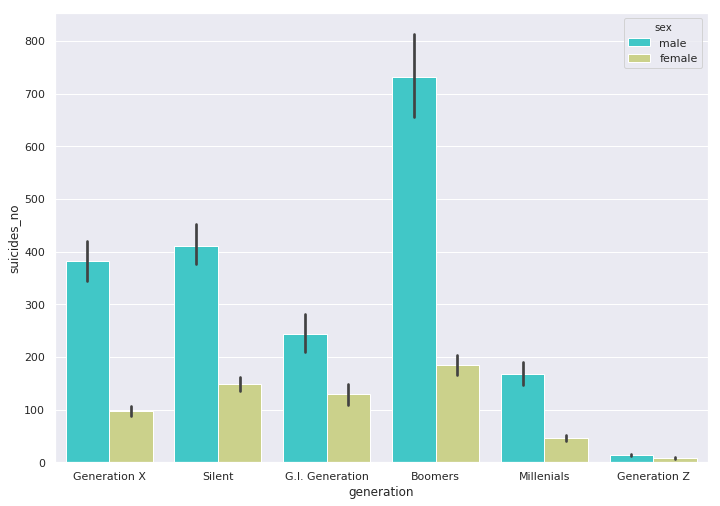

In [139]:
# Visualising based on generation
sns.set(rc={'figure.figsize':(11.7,8.27)})
generation_based = sns.barplot(x = data['generation'], y = data['suicides_no'],hue='sex',data=data, palette='rainbow')

## Suicides commited per 100k population

In [140]:
per100k = data.groupby(['country', 'year'])[['suicides/100k pop']].sum().sort_values(by='suicides/100k pop',ascending=False).head(20).reset_index()
per100k.style.background_gradient(cmap='spring_r',subset=['suicides/100k pop'])

,country,year,suicides/100k pop
0,Lithuania,1995,639.3
1,Lithuania,1996,595.61
2,Hungary,1991,575
3,Lithuania,2000,571.8
4,Hungary,1992,570.26
5,Lithuania,2001,568.98
6,Russian Federation,1994,567.64
7,Lithuania,1998,566.36
8,Lithuania,1997,565.44
9,Lithuania,1999,561.53


### Highest Suicides per 100k population was of Lithuania in 1995 

### Finding Realtion between HDI (Human Development Index) and no of suicides

In [141]:
data['HDI for year'].mean()

0.77660114777618

In [158]:
by_hdi=data.groupby(['country','year'])[['HDI for year','suicides_no']].mean().sort_values(by='HDI for year',ascending=True).head(50)
by_hdi.style.background_gradient(cmap='autumn',subset=['suicides_no'])

###     Finding Realtion between GDP (Gross Domestic Product) per capita  and no of suicides
######   Gross Domestic Product (GDP) per capita shows a country's GDP divided by its total population

In [157]:
by_gdp=data.groupby(['country','year','gdp_per_capita'])[['suicides_no']].mean().sort_values(by='suicides_no',ascending=False).head(50)
by_gdp.style.background_gradient(cmap='autumn',subset=['suicides_no'])

## Conclusion


### 1. Every 3 minutes, one person around the world had commited suicide between year 1985-2016, Data show suicide is the leading cause of death among those between the age group of 35 and 54 for both mens and womens

### 2. We can see that high GDP per capita does not immediately translate to a higher happiness index and less suicide cases. This tells us that it is certain that the richer is not necessarily the happiest. Therefore, besides income, there must be other important factors that leds people to take this step, but from above analysis it can be concluded that country with lesser population and higher GDP per capita has less suicide cases.

### 3. Year between 1999-2004 were worst years having average suicides of more than 250,000 people per year and from 1999 to 2010, the suicide rate among age group 35 to 54 rose by nearly 30 percent 


### 4. Suicide is often thought of as a gender-neutral issue, but in reality, it’s a problem that affects men far more than women. Three times as many men kill themselves every year than women do, that means more men are dying from suicide than car accident